In [1]:
# import all necessary packages and functions.
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_trip_201402 = pd.read_csv('201402_trip_data.csv', names=('TripID','Duration','Start_Date','Start_Station','Start_Terminal','End_Date','End_Station','End_Terminal','Bike','Subscription_Type','Zip_Code'), header = 0)
df_trip_201402['Start_Date'] = pd.to_datetime(df_trip_201402['Start_Date'])
df_trip_201402['End_Date'] = pd.to_datetime(df_trip_201402['End_Date'])

In [3]:
df_trip_201402['Time_diff'] = 0
time_diff = df_trip_201402['End_Date'] - df_trip_201402['Start_Date']
time_diff = pd.to_datetime(time_diff)

total_time = []
for i in time_diff:
    h = i.hour
    m = i.minute
    tt = h*60 + m
    total_time.append(tt)

df_trip_201402['Time_diff'] = total_time

In [4]:
time_set = set(total_time)
time_set = list(time_set)
time_s = []
for y in time_set:
    if (y<=60):
        time_s.append(y)

In [5]:
sub = 0
cust = 0
su_l, cu_l, total_l = [],[],[]
for t in time_s:
    df = df_trip_201402[df_trip_201402['Time_diff'] == t]
    sub,cust = 0,0
    for j in range(len(df.index)):
        if (df.iloc[j]['Subscription_Type'] == "Subscriber"):
            sub += 1
        else:
            cust +=1
    su_l.append(sub)
    cu_l.append(cust)
    total_l.append(sub + cust)

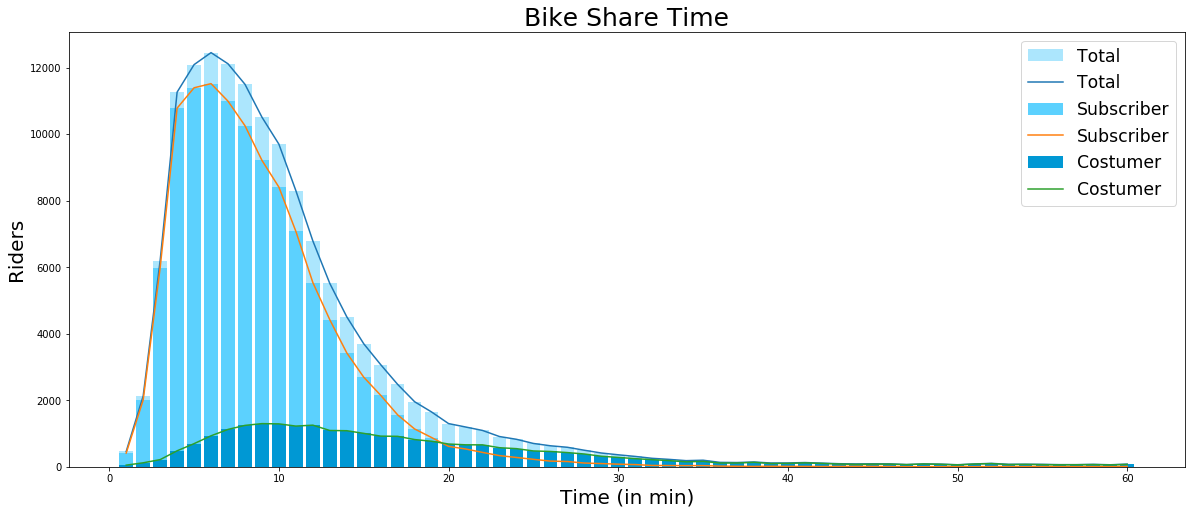

In [10]:
plt.figure(figsize=(20,8))
plt.title("Bike Share Time", fontsize = 25)
plt.xlabel("Time (in min)", fontsize = 20)
plt.ylabel("Riders", fontsize = 20)
p11, = plt.plot(time_s,total_l)
p22, = plt.plot(time_s,su_l)
p33, = plt.plot(time_s,cu_l)
p1 = plt.bar(time_s,total_l, color = "#ACE6FD")
p2 = plt.bar(time_s,su_l, color = "#5CD1FE")
p3 = plt.bar(time_s,cu_l, color = "#0098D4")
plt.legend([p1,p11,p2,p22,p3,p33],["Total","Total","Subscriber","Subscriber","Costumer","Costumer"],fontsize = 'xx-large')
plt.show()